In [3]:
import pandas as pd
import matplotlib.pylab as plt


In [4]:
df_train = pd.read_csv('./train.csv', )
df = df_train.copy()

In [7]:
def sort_maker(dataframe,column_name):
    result_data = dataframe.sort_values(column_name)[column_name].to_frame().reset_index()
    del result_data['index']
    return result_data


In [9]:
def get_hist(df, max_range = 20, length = 5):
    all_ans = []
    for j in range(0,max_range):   
        ans = []
        for index , i in enumerate(df.between(length*j, length*(j+1)).tolist()):
            if i is True:
                ans.append(i)
        all_ans.append(ans)
    new_hist = []
    for i in all_ans:
        new_hist.append(len(i))
    return new_hist

In [23]:
def plot_hist(survived_pass, all_pass):
    res_of_hist = []
    for i in range(0,len(all_pass)):
        if(all_pass[i] != 0):
            res_of_hist.append(survived_pass[i] / all_pass[i])
        else:
            res_of_hist.append(0)
    # pd.DataFrame(res_of_hist).plot.bar()
    return pd.DataFrame(res_of_hist)

In [11]:
def get_hist_p(df):
    res = []
    for i in range(1,4):
        res.append(df.tolist().count(i))
    return res

array([<AxesSubplot:title={'center':'0'}>], dtype=object)

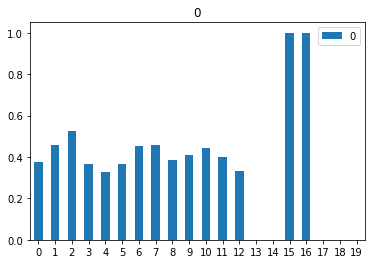

In [29]:
plot_hist(get_hist(df.loc[df.Survived == 1].Age.fillna(0)), get_hist(age_df)).plot.bar(rot=0, subplots=True, layout=(1,2)))

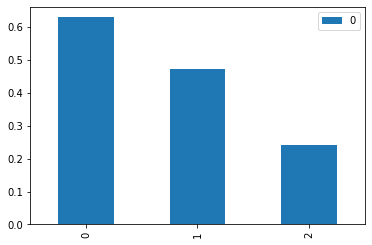

In [13]:
plot_hist(get_hist_p(df.loc[df.Survived == 1].Pclass),get_hist_p(df.Pclass) )

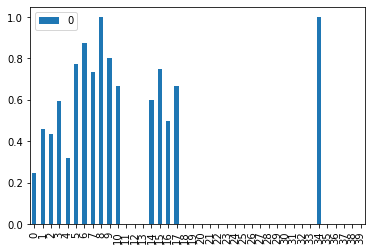

In [14]:
plot_hist(get_hist(df.loc[df.Survived == 1].Fare,40,15),get_hist(df.Fare,40,15) )

In [17]:
# df.loc[(df.Sex == "male") & (df.Survived == 1)]